In [22]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [23]:
CAT_SIGNAL_PATH = "/home/gabir/DATASETS/CER01A50"

In [24]:
class LfpData:

    def __init__(self, file_path):
        with open(os.path.join(file_path, "Bin_cer01a50-LFP.json"), 'r+') as f:
            lfp_data = json.loads(f.read())
        print(lfp_data)
        stim_cond_file_path = os.path.join(file_path, lfp_data['stimulus_condition_file'])
        with open(stim_cond_file_path, 'r+') as f:
            counter = 0
            lfp_data['stimulusOrder'] = []
            for st in f.read().split('\n'):
                lfp_data['stimulusOrder'].append(int(st))
                counter += 1
                if counter == 60:
                    break
        print(lfp_data['stimulusOrder'])
        
        print(lfp_data['bin_file_names'])
        lfp_data['channels'] = np.array(
            [np.fromfile(open(os.path.join(file_path, file), 'rb'), np.float32) for file in lfp_data['bin_file_names']])
        
        
        self.file_path = file_path
        self.bin_file_names = lfp_data['bin_file_names']
        self.trial_length = lfp_data['trial_length']
        self.sampling_frequency = lfp_data['sampling_frequency']
        self.number_of_lfp_files = lfp_data['number_of_lfp_files']
        self.ldf_file_version = lfp_data['ldf_file_version']
        self.stimulus_on_at = lfp_data['stimulus_on_at']
        self.stimulus_off_at = lfp_data['stimulus_off_at']
        self.stimulus_condition_file = lfp_data['stimulus_condition_file']
        self.number_of_conditions = lfp_data['number_of_conditions']
        self.trials_per_condition = lfp_data['trials_per_condition']
        self.stimulusOrder = lfp_data['stimulusOrder']
        self.channels = lfp_data['channels']

In [25]:
def load_dataset_to_ndarray(dataset_path):
    lfp_data = LfpData(dataset_path)

    dataset = np.zeros((3,20,47,28000))
    curElem = [0, 0, 0]
    
    for i in range(0, lfp_data.channels.shape[1] // 28000):
        condNum = lfp_data.stimulusOrder[i] - 1
        dataset[condNum, curElem[condNum], :, :] = lfp_data.channels[:,
                                        (i * 28000):((i * 28000) + 28000)]
        curElem[condNum] += 1

    return dataset

{'bin_file_names': ['Bin_cer01a50-LFP-Ch01.bin', 'Bin_cer01a50-LFP-Ch02.bin', 'Bin_cer01a50-LFP-Ch03.bin', 'Bin_cer01a50-LFP-Ch04.bin', 'Bin_cer01a50-LFP-Ch05.bin', 'Bin_cer01a50-LFP-Ch06.bin', 'Bin_cer01a50-LFP-Ch07.bin', 'Bin_cer01a50-LFP-Ch08.bin', 'Bin_cer01a50-LFP-Ch09.bin', 'Bin_cer01a50-LFP-Ch10.bin', 'Bin_cer01a50-LFP-Ch11.bin', 'Bin_cer01a50-LFP-Ch12.bin', 'Bin_cer01a50-LFP-Ch13.bin', 'Bin_cer01a50-LFP-Ch14.bin', 'Bin_cer01a50-LFP-Ch15.bin', 'Bin_cer01a50-LFP-Ch16.bin', 'Bin_cer01a50-LFP-Ch17.bin', 'Bin_cer01a50-LFP-Ch18.bin', 'Bin_cer01a50-LFP-Ch19.bin', 'Bin_cer01a50-LFP-Ch20.bin', 'Bin_cer01a50-LFP-Ch21.bin', 'Bin_cer01a50-LFP-Ch22.bin', 'Bin_cer01a50-LFP-Ch23.bin', 'Bin_cer01a50-LFP-Ch24.bin', 'Bin_cer01a50-LFP-Ch25.bin', 'Bin_cer01a50-LFP-Ch26.bin', 'Bin_cer01a50-LFP-Ch27.bin', 'Bin_cer01a50-LFP-Ch28.bin', 'Bin_cer01a50-LFP-Ch29.bin', 'Bin_cer01a50-LFP-Ch30.bin', 'Bin_cer01a50-LFP-Ch31.bin', 'Bin_cer01a50-LFP-Ch32.bin', 'Bin_cer01a50-LFP-Ch33.bin', 'Bin_cer01a50-LFP-Ch34.

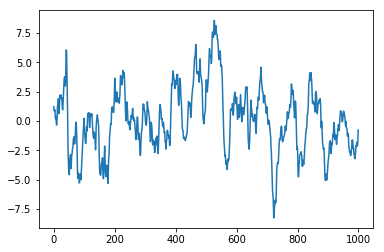

float64


OSError: 78960000 requested and 66265584 written

In [26]:
dataset = load_dataset_to_ndarray(CAT_SIGNAL_PATH)

print(dataset[0,0,:28000].shape)
plt.plot(dataset[0,0,0,:1000])
plt.show()
print(dataset.dtype)
np.save("../datasets/cer01a50.npy", dataset)

In [ ]:
old_dataset = np.load("/home/gabir/DATASETS/CER01A50/cer01a50.npy")
print(old_dataset.item()["channels"].dtype)